In [188]:
import pandas as pd
import numpy as np
import math
area = 0.0003211 #m
resistivity = 1.68*10**(-8) #ohm m
df1 = pd.read_csv("./ia.csv")
df2 = df1.drop(columns=["Diameter"])
df1['Average'] = df2.mean(numeric_only=True, axis=1)
df1['Standard Deviation'] = df2.std(axis=1)
df1["BOI"] = (df1["Average"]**0.5)
df1['Power'] = ((df1['Average']**2)*area)/(resistivity * 30 * math.pi * (df1["Diameter"] * 0.001))
df1['Fit']=(2.08*10**8)/(1+2.7**(df1['Power']))
df1

,Diameter,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Average,Standard Deviation,BOI,Power,Fit
0,25.9,0.8,0.7,0.9,1.0,1.0,0.88,0.130384,0.938083,6.063529e+03,0.0
1,32.0,36.9,36.8,36.7,37.0,36.9,36.86,0.114018,6.071244,8.610346e+06,0.0
2,36.2,78.1,78.2,78.0,78.3,78.2,78.16,0.114018,8.840814,3.422319e+07,0.0
3,41.2,154.0,153.0,155.0,159.0,160.0,156.20,3.114482,12.498000,1.200949e+08,0.0
4,43.5,200.0,202.0,204.0,206.0,208.0,204.00,3.162278,14.282857,1.940131e+08,0.0
5,45.9,215.0,216.0,217.0,218.0,219.0,217.00,1.581139,14.730920,2.080495e+08,0.0


 
0.7478 x - 18.22


Text(0, 0.5, 'Current (±10% mA)')

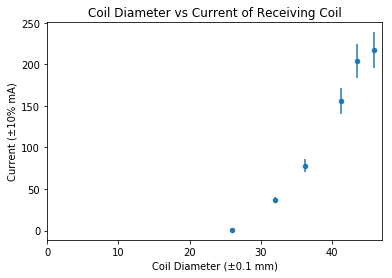

In [211]:
xerr=0.1
yerr=0.1
slope_equation = np.polyfit(df1["Diameter"].iloc[:-1],df1["BOI"].iloc[:-1], 1)
max_y = [0.7,208.0]
min_y = [1.0,200.0]
max_y = [i**0.5 for i in max_y]
min_y = [i**0.5 for i in min_y]
m_x = [25.9,43.5]
max_slope_equation = np.polyfit(m_x,max_y,1)
min_slope_equation = np.polyfit(m_x,min_y,1)
min_slope = np.poly1d(min_slope_equation)
max_slope = np.poly1d(max_slope_equation)
slope = np.poly1d(slope_equation)
print(slope)
df1['Trendline'] = slope(df1["Diameter"])
df1['Minimum Slope'] = min_slope(df1["Diameter"])
df1['Maximum Slope'] = max_slope(df1["Diameter"])
ax=df1.plot.scatter(x="Diameter",y="Average",xerr=0.1,yerr=df1["Average"]*yerr, title="Coil Diameter vs Current of Receiving Coil")
ax.set_xlim(left=0)
"""
bx=df1.plot(ax=ax,x="Diameter",y="Trendline")
cx=df1.plot(ax=bx,x="Diameter",y="Minimum Slope")
dx=df1.plot(ax=cx,x="Diameter",y="Maximum Slope")
"""
ax.set_xlabel("Coil Diameter (±0.1 mm)")
ax.set_ylabel("Current (±10% mA)")

#bx.errorbar(df1["Diameter"], df1["Average"], df1["Average"]*yerr, 0.1, barsabove='True')

In [205]:
df1["Average"].iloc[:-1].corr(df1["Trendline"])**2

0.9476318105368803

In [153]:
""""
slope_equation = np.polyfit(df1["Diameter"],df1["Fit"], deg=1)
print(slope_equation)
slope = np.poly1d(slope_equation)
df1['fTrendline'] = slope(df1["Diameter"])
ax=df1.plot.scatter(x="Diameter",y="Fit")
ax.set_xlabel("Diameter (cm)")
ax.set_ylabel("idk")
ax.set_xlim(left=0)
#bx=df1.plot(ax=ax,x="Diameter",y="fTrendline", title="Diameter vs Fit")
""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-153-984a77b648ed>, line 11)

In [52]:
dfn1 = pd.read_csv("./ia.csv")
dfn2 = dfn1.drop(columns=["Diameter"])
dfn2 *= 0.02
idx = 0
name = "Diameter"
boi_value = dfn1["Diameter"]
dfn2.insert(loc=idx,column=name,value=boi_value)
dfn2

,Diameter,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,32.0,0.360,0.370,0.364,0.380,0.368
1,36.1,1.440,1.442,1.438,1.444,1.420
2,38.5,2.444,2.438,2.442,2.440,2.440
3,41.2,3.080,3.060,3.100,3.180,3.200
4,43.5,4.200,4.240,4.280,4.320,4.360


In [209]:
dfboi = df1.drop(columns=["Trial 1","Trial 2","Trial 3","Trial 4","Trial 5","Standard Deviation","Power","Fit","Trendline","Average"])
dfboi.to_csv("./boi.csv")

In [212]:
18.22/0.7478


24.364803423375232